### INTRODUCTION


The purpose of this work is to analyse the labour market Italian dataset, by forcusing on the Lombardy zone. The goals of this project are:
To analyse, visualise and compare the main factors in labour acquisition such as: gender, age, economic sector, study qualification and others.
To identify some statistical attribute in data, primarily on Age, being the average.
    
Labour force dataset and its description is composed of the following main components:

-Date
-Gender
-Age
-Economic Sector
-Study title
-Workmode
-Contract
-Province of the Business.


### _LIBRARIES 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import binom
import matplotlib as mpl


The loading of the Labour dataset which was downloaded in csv format.

In [6]:
data1 = pd.read_csv("rapp_pror_16-17.csv")

A glance at the dataset.

In [7]:
data1

,DATE,GENDER,AGE,ECONOMIC SECTOR DETAIL,STUDY TITLE,CONTRACT,WORKMODE,PROVINCE OF BUSINESS,ITALY
0,1/1/2016,M,24,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MILANO,ITALIA
1,1/1/2016,F,25,Alberghi,LAUREA - Vecchio o nuovo ordinamento,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MILANO,ITALIA
2,1/1/2016,M,26,Pulizia generale (non specializzata) di edifici,LICENZA ELEMENTARE,LAVORO INTERMITTENTE,TEMPO PIENO,MILANO,ITALIA
3,1/1/2016,M,22,Ristorazione con somministrazione,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE VERTICALE,MILANO,ITALIA
4,1/1/2016,M,59,Pulizia generale (non specializzata) di edifici,NESSUN TITOLO DI STUDIO,LAVORO INTERMITTENTE,TEMPO PIENO,MILANO,ITALIA
...,...,...,...,...,...,...,...,...,...
774248,12/12/2017,M,30,Fabbricazione di altri prodotti in gomma nca,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MILANO,ITALIA
774249,12/12/2017,F,23,Fabbricazione di altre parti ed accessori per ...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
774250,12/12/2017,M,40,Gelaterie e pasticcerie,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,VARESE,ITALIA
774251,12/12/2017,M,21,Fabbricazione di strutture metalliche e parti ...,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BRESCIA,ITALIA


###### Next gather some information about different column in dataset.
##### Information about the number of rows, columns, column data types, memory usage, etc.

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774253 entries, 0 to 774252
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   DATE                    774253 non-null  object
 1   GENDER                  774253 non-null  object
 2   AGE                     774253 non-null  int64 
 3   ECONOMIC SECTOR DETAIL  773791 non-null  object
 4   STUDY TITLE             774253 non-null  object
 5   CONTRACT                774253 non-null  object
 6   WORKMODE                774253 non-null  object
 7   PROVINCE OF BUSINESS    774253 non-null  object
 8   ITALY                   774253 non-null  object
dtypes: int64(1), object(8)
memory usage: 53.2+ MB


Base on the memory usage, which is high, due to the dataset size. 

In [9]:
print("The average age within the workforce :")
meanAge  = data1['AGE'].mean()
print(meanAge)

print("-------------------------------------------")

print("The common age-gap within the workforce :")
modeAge  = data1['AGE'].mode()
print(modeAge)

print("-------------------------------------------")

print("The most employed sector :")
modeSector  = data1['ECONOMIC SECTOR DETAIL'].mode()
print(modeSector)

print("-------------------------------------------")

print("The common contractual agreement :")
modeContract  = data1['CONTRACT'].mode()
print(modeContract)

The average age within the workforce :
35.151995536342774
-------------------------------------------
The common age-gap within the workforce :
0    23
dtype: int64
-------------------------------------------
The most employed sector :
0    Pulizia generale (non specializzata) di edifici
dtype: object
-------------------------------------------
The common contractual agreement :
0    LAVORO A TEMPO DETERMINATO
dtype: object


In [10]:
data1.describe(include=object)

,DATE,GENDER,ECONOMIC SECTOR DETAIL,STUDY TITLE,CONTRACT,WORKMODE,PROVINCE OF BUSINESS,ITALY
count,774253,774253,773791,774253,774253,774253,774253,774253
unique,288,2,1135,12,20,5,12,160
top,8/4/2017,M,Pulizia generale (non specializzata) di edifici,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MILANO,ITALIA
freq,12137,450887,31940,300210,685267,510216,296378,581044


In [11]:
data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE,774253.0,35.151996,11.355002,0.0,25.0,34.0,44.0,96.0


C:\Users\kwabe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness Distribution: 0.49


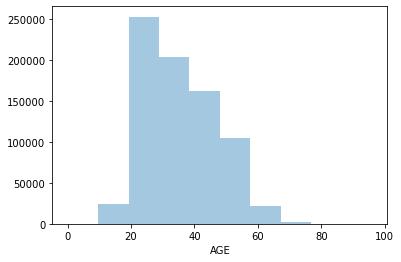

In [12]:
dist = sns.distplot(data1.AGE, bins=10, kde = False)
print("Skewness Distribution:", round(stats.skew(data1.AGE),2))

In [13]:
def get_dataset_range(data1, show=True):
    """ Gets the dataset date range using the data column.

    Args:
        df (pandas.core.frame.DataFrame): Object representing the Pandas dataframe.
        show (bool): Shows the first and last date available in the dataset.
    Returns: 
        tuple: the dataset date range.
    """
    first = data1['DATE'].iloc[0]
    last = data1['DATE'].iloc[-1]
    if show:
        print(f"FIRST ENTRY DATE: {first}")
        print(f"LAST  ENTRY DATE: {last}")
    return first, last 

In [14]:
#the start and end of the records entry.

FIRST_DATE, LAST_DATE = get_dataset_range(data1)

FIRST ENTRY DATE: 1/1/2016
LAST  ENTRY DATE: 12/12/2017


In [15]:
#Grouping of the data based on the Sector of employement


df1_groupby_sector = data1.groupby('ECONOMIC SECTOR DETAIL')
df1_groupby_sector.size()

ECONOMIC SECTOR DETAIL
Acquacoltura in acqua di mare, salmastra o lagunare e servizi connessi                               174
Acquacoltura in acque dolci e servizi connessi                                                        22
Affari esteri                                                                                         44
Affittacamere per brevi soggiorni, case ed appartamenti per vacanze, bed and breakfast, residence    658
Affitto di aziende                                                                                    56
                                                                                                    ... 
Trattamento igienico del latte                                                                       122
Trivellazioni e perforazioni                                                                         185
Università popolare                                                                                    1
Utilizzo di aree forestali      

In [16]:
data1.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774253 entries, 0 to 774252
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   DATE                    774253 non-null  object
 1   GENDER                  774253 non-null  object
 2   AGE                     774253 non-null  int64 
 3   ECONOMIC SECTOR DETAIL  773791 non-null  object
 4   STUDY TITLE             774253 non-null  object
 5   CONTRACT                774253 non-null  object
 6   WORKMODE                774253 non-null  object
 7   PROVINCE OF BUSINESS    774253 non-null  object
 8   ITALY                   774253 non-null  object
dtypes: int64(1), object(8)
memory usage: 53.2+ MB


C:\Users\kwabe\AppData\Local\Temp/ipykernel_44352/3325286438.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data1.info(verbose=True, null_counts=True)


In [17]:
#Checking for any null values

print(data1.isnull().values.sum())

462


In [18]:
print(data1.isnull().sum())

DATE                        0
GENDER                      0
AGE                         0
ECONOMIC SECTOR DETAIL    462
STUDY TITLE                 0
CONTRACT                    0
WORKMODE                    0
PROVINCE OF BUSINESS        0
ITALY                       0
dtype: int64


In [19]:
modeSector = data1['ECONOMIC SECTOR DETAIL'].mode()
print(modeSector)

0    Pulizia generale (non specializzata) di edifici
dtype: object


In [20]:
data1['ECONOMIC SECTOR DETAIL'].fillna(data1['ECONOMIC SECTOR DETAIL'].mode()[0], inplace=True)

In [21]:
print(data1.isnull().values.sum())

0


In [22]:
#A sample of the dataset, which will be proven to show its equality


sample_df1 = data1.sample(int(len(data1) * 0.2))
sample_df1.shape

(154850, 9)

In [23]:
print("\n Distinct value of Study Qualification  ")
print(sample_df1['STUDY TITLE'].value_counts().count())

print("\n Distinct value of work mode  ")
print(sample_df1['WORKMODE'].value_counts().count())

print("\n Distinct value of economic sector ")
print(sample_df1['ECONOMIC SECTOR DETAIL'].value_counts().count())

print(" \n Distinct value of contract type ")
print(sample_df1['CONTRACT'].value_counts().count())

print("\n Distinct value of location ")
print(sample_df1['PROVINCE OF BUSINESS'].value_counts().count())


 Distinct value of Study Qualification  
12

 Distinct value of work mode  
5

 Distinct value of economic sector 
1062
 
 Distinct value of contract type 
20

 Distinct value of location 
12


{'whiskers': [<matplotlib.lines.Line2D at 0x27fb7799f40>,
 'caps': [<matplotlib.lines.Line2D at 0x27fb77ab5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27fb7799af0>],
 'medians': [<matplotlib.lines.Line2D at 0x27fb77abd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x27fb77b60d0>],
 'means': []}

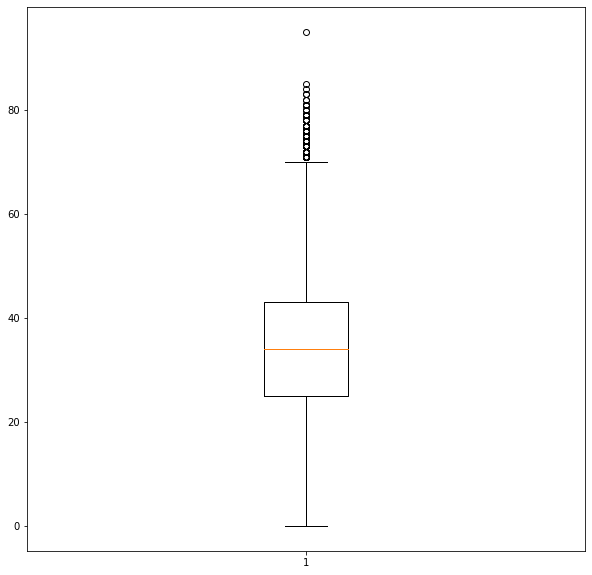

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(sample_df1.AGE)

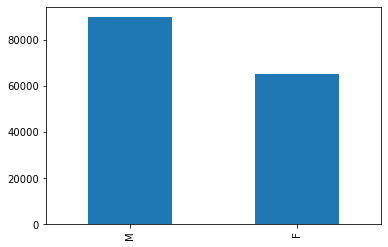

In [25]:
#A look at the gender distribution of work 


rateCount= sample_df1.GENDER.value_counts()
xaxis = rateCount.index
value = rateCount.values

ax = rateCount.plot.bar(x=xaxis, y=value)

<AxesSubplot:xlabel='AGE', ylabel='WORKMODE'>

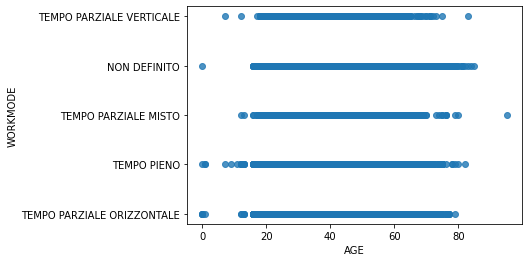

In [26]:
sns.regplot(x = "AGE", y="WORKMODE", data=sample_df1, fit_reg = False, scatter_kws={"alpha": 0.8})

In [27]:
df1_groupby_sector = data1.groupby('PROVINCE OF BUSINESS')
df1_groupby_sector.size()

PROVINCE OF BUSINESS
BERGAMO             94311
BRESCIA            137935
COMO                27422
CREMONA             30954
LECCO               21290
LODI                 9692
MANTOVA             32365
MILANO             296378
MONZA E BRIANZA     40024
PAVIA               22688
SONDRIO             12657
VARESE              48537
dtype: int64

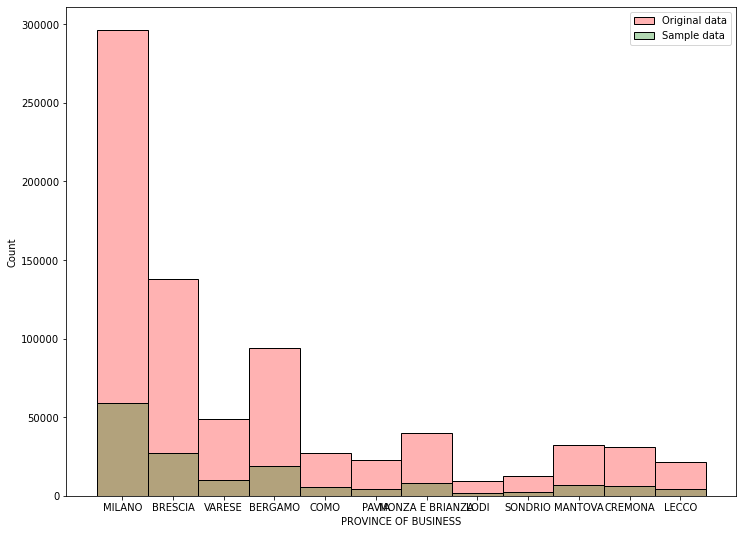

In [28]:
#The prove of the sample value


fig, ax = plt.subplots(figsize=(12, 9))

sns.histplot(
    data=data1, x="PROVINCE OF BUSINESS", label="Original data", color="red", alpha=0.3, bins=15
)
sns.histplot(
    data=sample_df1, x="PROVINCE OF BUSINESS", label="Sample data", color="green", alpha=0.3, bins=15
)

plt.legend()
plt.show();

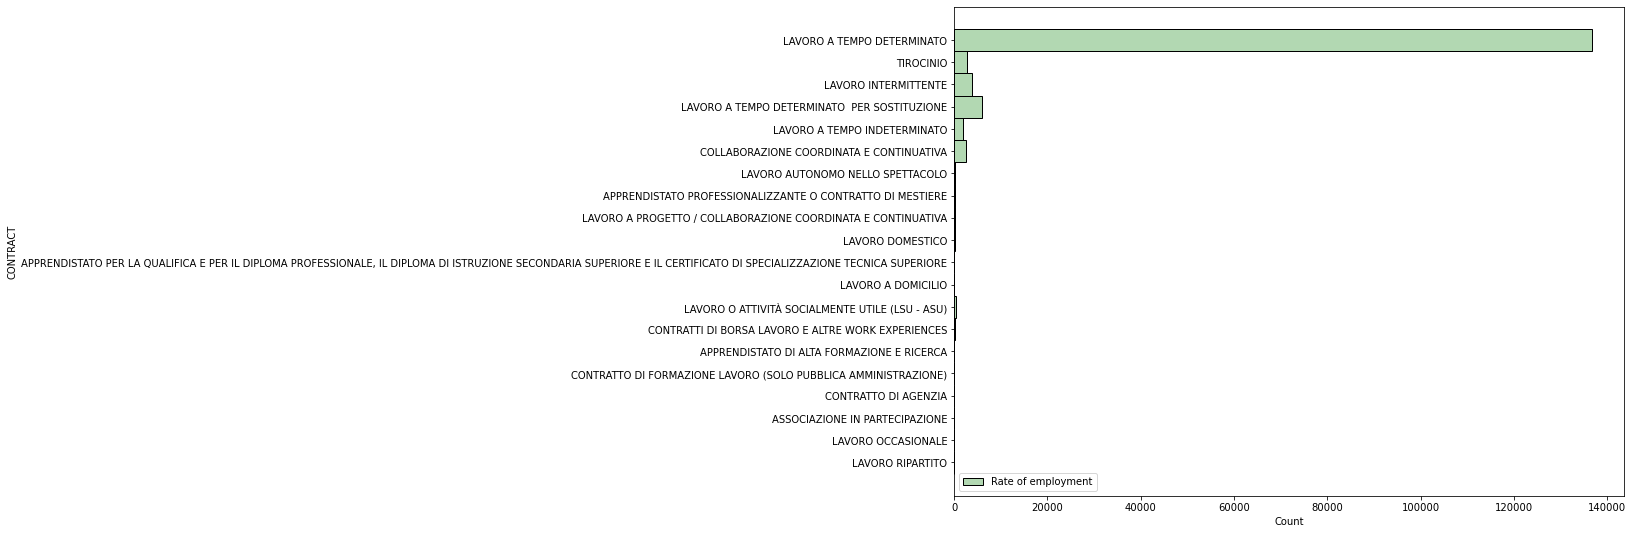

In [29]:
count = sample_df1.CONTRACT.value_counts()

fig, ax = plt.subplots(figsize=(12, 9))

sns.histplot(
     data=sample_df1, y="CONTRACT", label="Rate of employment", color="green", alpha=0.3, bins=12)
plt.legend()
plt.show();

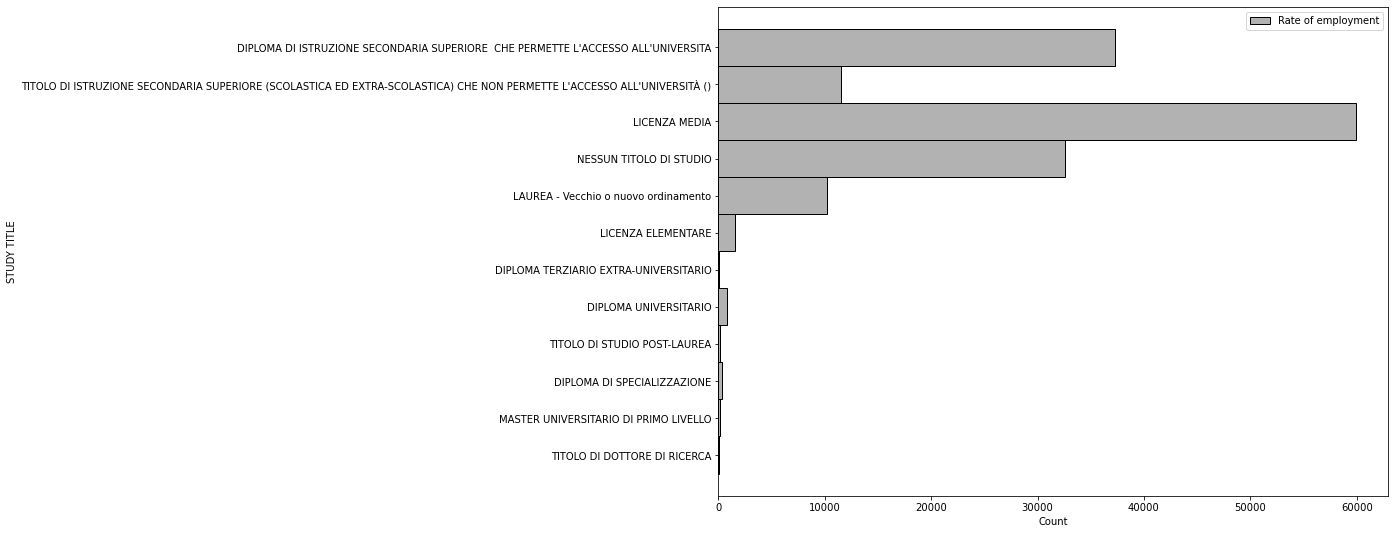

In [30]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.histplot(
     data=sample_df1, y="STUDY TITLE", label="Rate of employment", color="black", alpha=0.3, bins=12)
plt.legend()
plt.show();

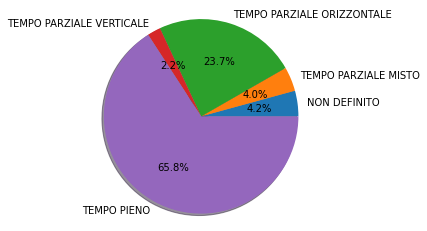

In [31]:
labels = sample_df1['WORKMODE'].astype('category').cat.categories.tolist()
counts = sample_df1['WORKMODE'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

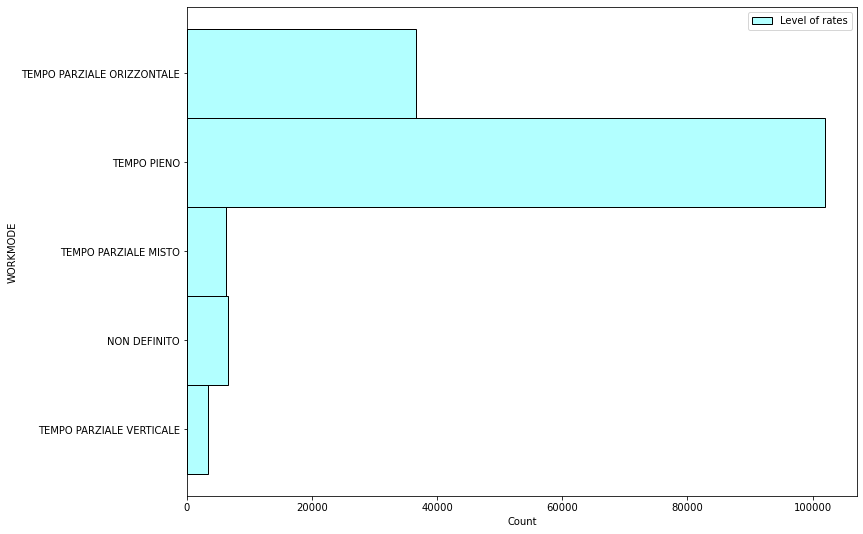

In [32]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.histplot(
    data=sample_df1, y="WORKMODE", label="Level of rates", color="cyan", alpha=0.3, bins=5
)

plt.legend()
plt.show()

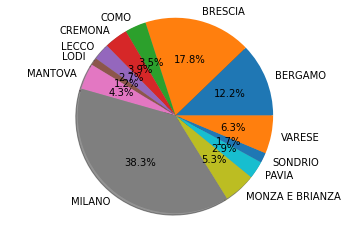

In [33]:
labels = sample_df1['PROVINCE OF BUSINESS'].astype('category').cat.categories.tolist()
counts = sample_df1['PROVINCE OF BUSINESS'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [34]:
cat_sample = sample_df1.select_dtypes(include=['object']).copy()
cat_sample.head()

,DATE,GENDER,ECONOMIC SECTOR DETAIL,STUDY TITLE,CONTRACT,WORKMODE,PROVINCE OF BUSINESS,ITALY
70907,6/3/2016,M,Strutture di assistenza residenziale per anzia...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MILANO,ITALIA
176584,12/6/2016,M,Produzione di margarina e di grassi commestibi...,TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCO...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MILANO,ITALIA
105139,7/4/2016,F,Produzione di prodotti di panetteria freschi,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE MISTO,BERGAMO,ITALIA
671072,11/9/2017,F,Servizi degli istituti di bellezza,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,PAVIA,ITALIA
319681,11/11/2016,M,Coltivazione di ortaggi(inclusi i meloni) in f...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE MISTO,BERGAMO,FILIPPINE


In [35]:
labels = sample_df1['PROVINCE OF BUSINESS'].astype('category').cat.categories.tolist()
replace_map_comp = {'PROVINCE OF BUSINESS' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'PROVINCE OF BUSINESS': {'BERGAMO': 1, 'BRESCIA': 2, 'COMO': 3, 'CREMONA': 4, 'LECCO': 5, 'LODI': 6, 'MANTOVA': 7, 'MILANO': 8, 'MONZA E BRIANZA': 9, 'PAVIA': 10, 'SONDRIO': 11, 'VARESE': 12}}


In [36]:
sample_df1_replace = sample_df1.copy()

In [37]:
sample_df1_replace.replace(replace_map_comp, inplace=True)

#print(sample_df1_replace.head())


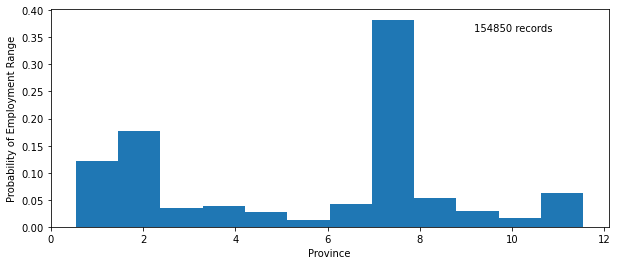

In [38]:
H, edges = np.histogram(sample_df1_replace['PROVINCE OF BUSINESS'], bins=12)

plt.figure(figsize=(10, 4))
ax = plt.subplot(111)
ax.bar(edges[:-1], H / float(sum(H)), width=edges[1] - edges[0])
ax.text(0.9, 0.9, "%g records" % len(sample_df1_replace),
        horizontalalignment="right", transform=ax.transAxes)
ax.set_xlabel("Province")
ax.set_ylabel("Probability of Employment Range")

plt.show()

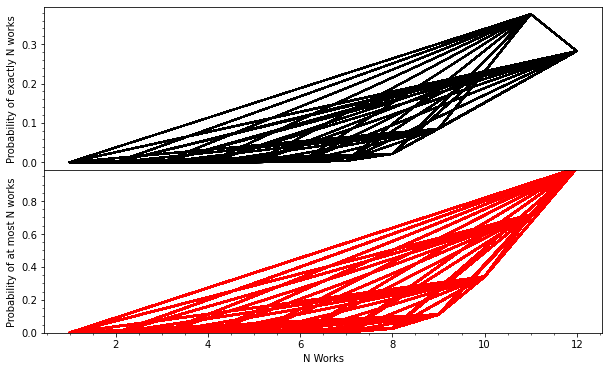

In [39]:
n_work = sample_df1_replace['PROVINCE OF BUSINESS']
total_province = 12
prob_of_success = 0.9
individual_probability = [binom.pmf(x, total_province, prob_of_success) for x in n_work]
cumulative_probability = [binom.cdf(x, total_province, prob_of_success) for x in n_work]

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(hspace=0)

ax = plt.subplot(211)
ax.plot(n_work, individual_probability, color="black")
ax.set_xticklabels([])
ax.set_ylabel("Probability of exactly N works")
ax.minorticks_on()

ax = plt.subplot(212)
ax.plot(n_work, cumulative_probability, color="red", linewidth=2)
ax.set_xlabel("N Works")
ax.set_ylabel("Probability of at most N works")
ax.set_ylim(0, 0.99)
ax.minorticks_on()

mpl.rcParams['agg.path.chunksize'] = 10000
plt.show()

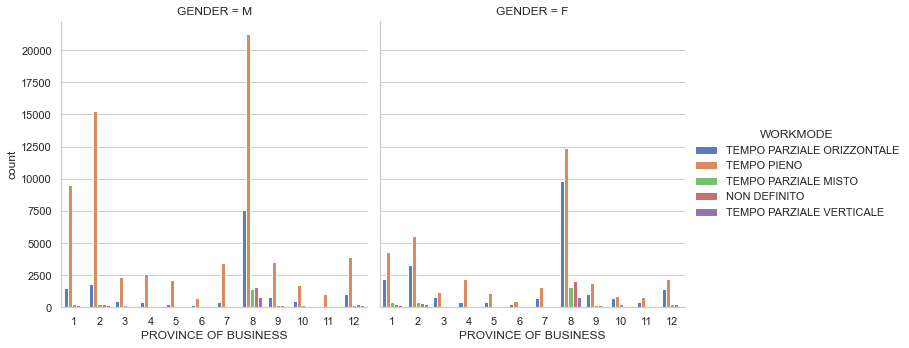

In [40]:
sns.set(style="whitegrid")

g = sns.catplot(x="PROVINCE OF BUSINESS", hue="WORKMODE", col="GENDER", kind="count", data=sample_df1_replace, palette="muted")

In [41]:
data2 = pd.read_csv("lavoro.csv")

In [42]:
data2

,DATE,GENDER,AGE,SECTOR,STUDY,CONTRACT,WORKMODE,PROVINCE,ITALY
0,10/4/2017,M,41,Realizzazione di coperture,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,MAROCCO
1,10/1/2018,M,16,Ristorazione con somministrazione,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA
2,7/1/2020,F,18,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA
3,3/1/2010,F,60,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
4,7/3/2014,M,60,Altre attività di lavori specializzati di cost...,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,LECCO,ITALIA
...,...,...,...,...,...,...,...,...,...
1048570,6/4/2019,F,50,Gelaterie e pasticcerie,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BRESCIA,ITALIA
1048571,10/2/2018,F,52,Strutture di assistenza infermieristica reside...,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BRESCIA,ITALIA
1048572,1/2/2012,F,19,Ristorazione con somministrazione,NESSUN TITOLO DI STUDIO,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BRESCIA,ROMANIA
1048573,4/9/2021,M,55,Lavori di meccanica generale,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA


In [43]:
data2.describe(include=object)

,DATE,GENDER,SECTOR,STUDY,CONTRACT,WORKMODE,PROVINCE,ITALY
count,1048575,1048575,1048154,1048479,1048575,1048575,1048575,1048575
unique,1805,2,1161,12,41,5,12,181
top,1/2/2018,M,Ristorazione con somministrazione,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MILANO,ITALIA
freq,4477,563475,66754,283120,733832,560755,438048,796901


In [44]:
data2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE,1048575.0,35.938884,11.924759,0.0,26.0,34.0,44.0,100.0


C:\Users\kwabe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness Distribution: 0.57


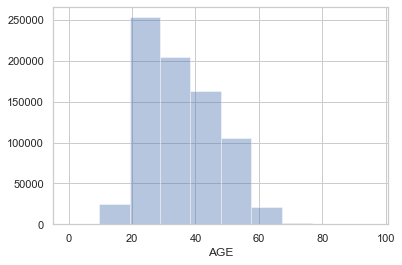

In [45]:
dist = sns.distplot(data1.AGE, bins=10, kde = False)
print("Skewness Distribution:", round(stats.skew(data2.AGE),2))

In [46]:
def get_dataset_range(data2, show=True):
    """ Gets the dataset date range using the data column.

    Args:
        df (pandas.core.frame.DataFrame): Object representing the Pandas dataframe.
        show (bool): Shows the first and last date available in the dataset.
    Returns: 
        tuple: the dataset date range.
    """
    first = data2['DATE'].iloc[0]
    last = data2['DATE'].iloc[-1]
    if show:
        print(f"FIRST ENTRY DATE: {first}")
        print(f"LAST  ENTRY DATE: {last}")
    return first, last

In [47]:
FIRST_DATE, LAST_DATE = get_dataset_range(data2)

FIRST ENTRY DATE: 10/4/2017
LAST  ENTRY DATE: 4/6/2020


In [48]:
df2_groupby_sector = data2.groupby('STUDY')
df2_groupby_sector.size()


STUDY
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE PERMETTE L'ACCESSO ALL'UNIVERSITA                                          274218
DIPLOMA DI SPECIALIZZAZIONE                                                                                                  5137
DIPLOMA TERZIARIO EXTRA-UNIVERSITARIO                                                                                         539
DIPLOMA UNIVERSITARIO                                                                                                        7565
LAUREA - Vecchio o nuovo ordinamento                                                                                       116104
LICENZA ELEMENTARE                                                                                                           9617
LICENZA MEDIA                                                                                                              283120
MASTER UNIVERSITARIO DI PRIMO LIVELLO                                               

In [49]:
data2.info(verbose=True, null_counts=True)

C:\Users\kwabe\AppData\Local\Temp/ipykernel_44352/3543585538.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data2.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   DATE      1048575 non-null  object
 1   GENDER    1048575 non-null  object
 2   AGE       1048575 non-null  int64 
 3   SECTOR    1048154 non-null  object
 4   STUDY     1048479 non-null  object
 5   CONTRACT  1048575 non-null  object
 6   WORKMODE  1048575 non-null  object
 7   PROVINCE  1048575 non-null  object
 8   ITALY     1048575 non-null  object
dtypes: int64(1), object(8)
memory usage: 72.0+ MB


In [50]:
print(data2.isnull().values.sum())

517


In [51]:
print(data2.isnull().sum())

DATE          0
GENDER        0
AGE           0
SECTOR      421
STUDY        96
CONTRACT      0
WORKMODE      0
PROVINCE      0
ITALY         0
dtype: int64


In [52]:
modeSector = data2['SECTOR'].mode()
print(modeSector)


0    Ristorazione con somministrazione
dtype: object


In [53]:
# Get the percentage of null values for each col.
data2.isnull().sum()/len(data2) * 100

DATE        0.000000
GENDER      0.000000
AGE         0.000000
SECTOR      0.040150
STUDY       0.009155
CONTRACT    0.000000
WORKMODE    0.000000
PROVINCE    0.000000
ITALY       0.000000
dtype: float64

In [54]:
data2.dropna(inplace=True)
print(data2)

              DATE GENDER  AGE  \
0        10/4/2017      M   41   
1        10/1/2018      M   16   
2         7/1/2020      F   18   
3         3/1/2010      F   60   
4         7/3/2014      M   60   
...            ...    ...  ...   
1048570   6/4/2019      F   50   
1048571  10/2/2018      F   52   
1048572   1/2/2012      F   19   
1048573   4/9/2021      M   55   
1048574   4/6/2020      F   51   

                                                    SECTOR  \
0                               Realizzazione di coperture   
1                        Ristorazione con somministrazione   
2                                       Rifugi di montagna   
3        Gestioni di funicolari, ski-lift e seggiovie s...   
4        Altre attività di lavori specializzati di cost...   
...                                                    ...   
1048570                            Gelaterie e pasticcerie   
1048571  Strutture di assistenza infermieristica reside...   
1048572                  Ristoraz

In [55]:
print(data2.isnull().values.sum())

0


In [56]:
sample_df2 = data2.sample(int(len(data2) * 0.1))
sample_df2.shape


(104805, 9)

In [57]:
print("\n Range value of Study Qualification  ")
print(sample_df2['STUDY'].value_counts().count())

print("\n Range value of work mode  ")
print(sample_df2['WORKMODE'].value_counts().count())

print("\n Range value of economic sector ")
print(sample_df2['SECTOR'].value_counts().count())

print(" \n Range value of contract type ")
print(sample_df2['CONTRACT'].value_counts().count())

print("\n Range value of location ")
print(sample_df2['PROVINCE'].value_counts().count())



 Range value of Study Qualification  
12

 Range value of work mode  
5

 Range value of economic sector 
1031
 
 Range value of contract type 
38

 Range value of location 
12


{'whiskers': [<matplotlib.lines.Line2D at 0x27fba463c70>,
 'caps': [<matplotlib.lines.Line2D at 0x27fba4703d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27fba4638e0>],
 'medians': [<matplotlib.lines.Line2D at 0x27fba470af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27fba470e80>],
 'means': []}

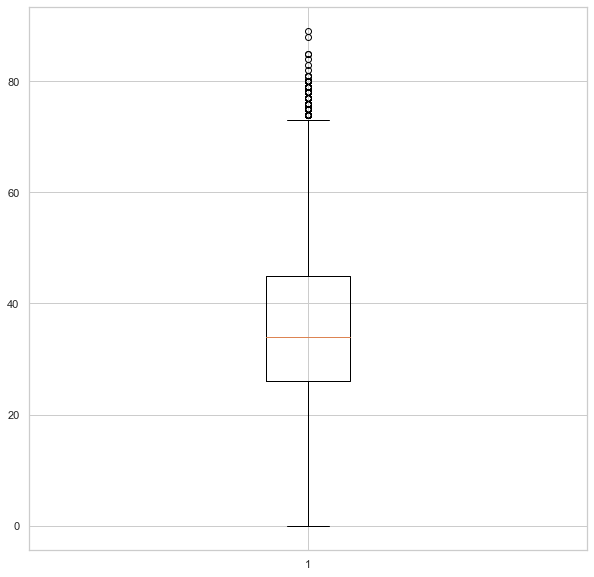

In [58]:
ig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(sample_df2.AGE)

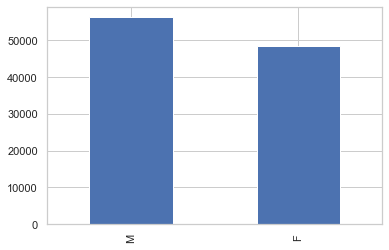

In [59]:
rateCount= sample_df2.GENDER.value_counts()
xaxis = rateCount.index
value = rateCount.values

ax = rateCount.plot.bar(x=xaxis, y=value)

<AxesSubplot:xlabel='AGE', ylabel='WORKMODE'>

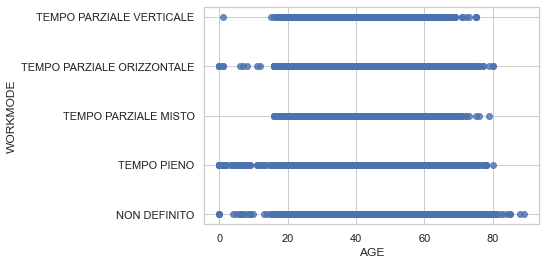

In [60]:
sns.regplot(x = "AGE", y="WORKMODE", data=sample_df2, fit_reg = False, scatter_kws={"alpha": 0.8})

In [61]:
df2_groupby_sector = data2.groupby('STUDY')
df2_groupby_sector.size()

STUDY
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE PERMETTE L'ACCESSO ALL'UNIVERSITA                                          274092
DIPLOMA DI SPECIALIZZAZIONE                                                                                                  5136
DIPLOMA TERZIARIO EXTRA-UNIVERSITARIO                                                                                         539
DIPLOMA UNIVERSITARIO                                                                                                        7563
LAUREA - Vecchio o nuovo ordinamento                                                                                       116085
LICENZA ELEMENTARE                                                                                                           9612
LICENZA MEDIA                                                                                                              283002
MASTER UNIVERSITARIO DI PRIMO LIVELLO                                               

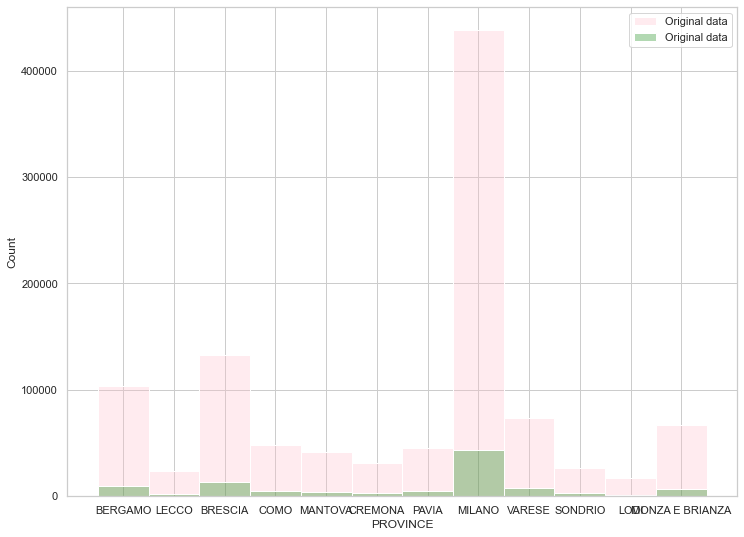

In [62]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.histplot(
    data=data2, x="PROVINCE", label="Original data", color="pink", alpha=0.3, bins=15
)
sns.histplot(
     data=sample_df2, x="PROVINCE", label="Original data", color="green", alpha=0.3, bins=15
)

plt.legend()
plt.show();

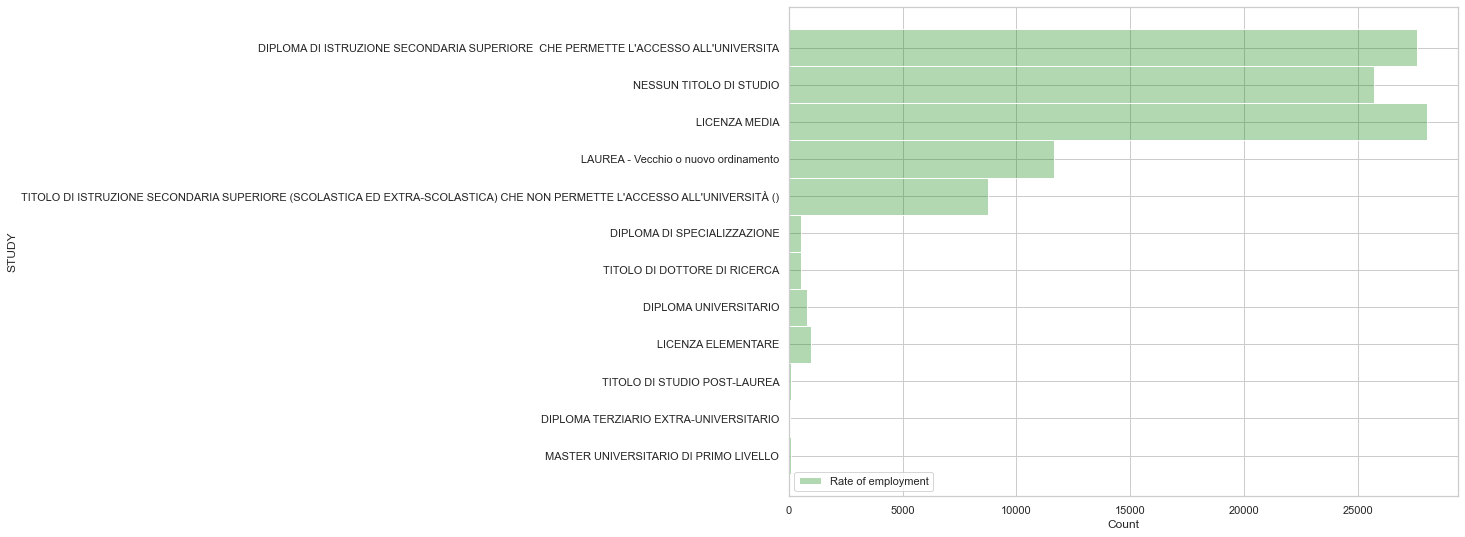

In [63]:
count = sample_df2.STUDY.value_counts()

fig, ax = plt.subplots(figsize=(12, 9))

sns.histplot(
     data=sample_df2, y="STUDY", label="Rate of employment", color="green", alpha=0.3, bins=12)
plt.legend()
plt.show();


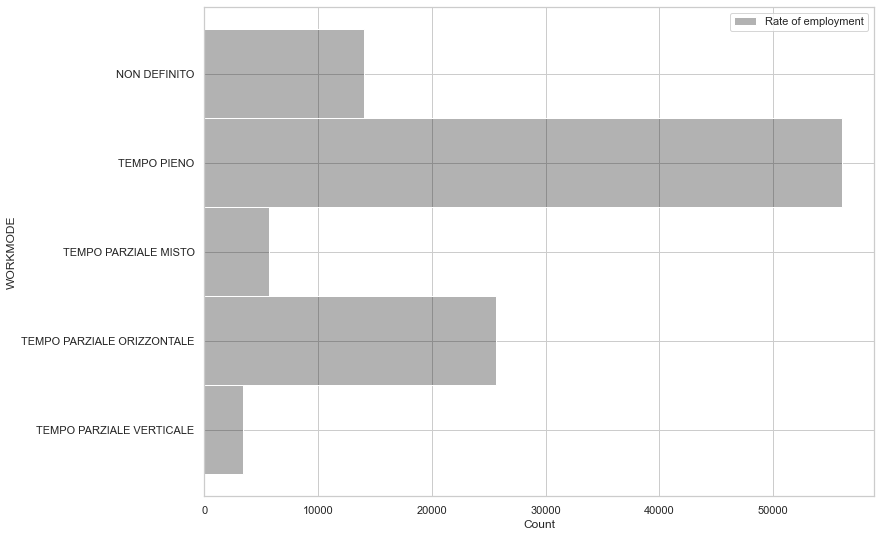

In [64]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.histplot(
     data=sample_df2, y="WORKMODE", label="Rate of employment", color="black", alpha=0.3, bins=12)
plt.legend()
plt.show();


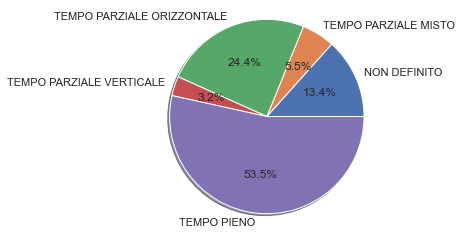

In [65]:

labels = sample_df2['WORKMODE'].astype('category').cat.categories.tolist()
counts = sample_df2['WORKMODE'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()



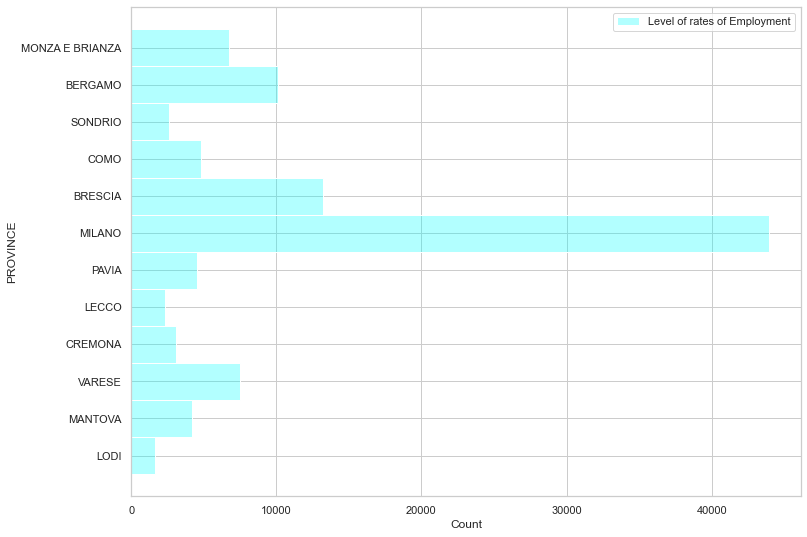

In [66]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.histplot(
    data=sample_df2, y="PROVINCE", label="Level of rates of Employment", color="cyan", alpha=0.3, bins=5
)

plt.legend()
plt.show()



In [67]:
labels = sample_df2['GENDER'].astype('category').cat.categories.tolist()
counts = sample_df2['GENDER'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]

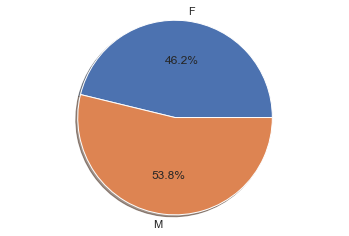

In [68]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [69]:
cat_sample = sample_df2.select_dtypes(include=['object']).copy()
cat_sample.head()

,DATE,GENDER,SECTOR,STUDY,CONTRACT,WORKMODE,PROVINCE,ITALY
987938,9/4/2020,F,Corsi di formazione e corsi di aggiornamento p...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,COLLABORAZIONE COORDINATA E CONTINUATIVA,NON DEFINITO,MONZA E BRIANZA,ITALIA
1009594,1/2/2019,M,Ipermercati,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
885602,9/9/2013,M,Alberghi,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,SONDRIO,EGITTO
818853,9/10/2021,M,Fabbricazione di altri rubinetti e valvole,LICENZA MEDIA,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
676167,4/10/2020,F,Altre attività di servizi per la persona nca,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE MISTO,COMO,ITALIA


In [70]:
labels = sample_df2['STUDY'].astype('category').cat.categories.tolist()
replace_map_comp = {'STUDY' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

#print(replace_map_comp)

In [71]:
sample_df2_replace = sample_df2.copy()

In [72]:
sample_df2_replace.replace(replace_map_comp, inplace=True)

#print(sample_df2_replace.head())


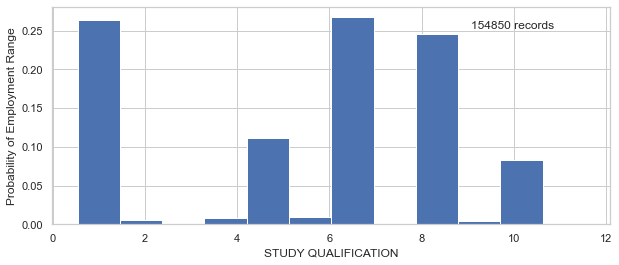

In [73]:
H, edges = np.histogram(sample_df2_replace['STUDY'], bins=12)

plt.figure(figsize=(10, 4))
ax = plt.subplot(111)
ax.bar(edges[:-1], H / float(sum(H)), width=edges[1] - edges[0])
ax.text(0.9, 0.9, "%g records" % len(sample_df1_replace),
        horizontalalignment="right", transform=ax.transAxes)
ax.set_xlabel("STUDY QUALIFICATION")
ax.set_ylabel("Probability of Employment Range")

plt.show()


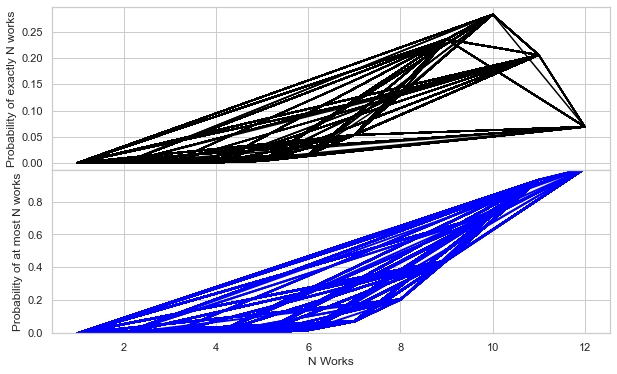

In [74]:

n_work = sample_df2_replace['STUDY']
total = 12
prob_of_success = 0.8
individual_probability = [binom.pmf(x, total, prob_of_success) for x in n_work]
cumulative_probability = [binom.cdf(x, total, prob_of_success) for x in n_work]

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(hspace=0)

ax = plt.subplot(211)
ax.plot(n_work, individual_probability, color="black")
ax.set_xticklabels([])
ax.set_ylabel("Probability of exactly N works")
ax.minorticks_on()

ax = plt.subplot(212)
ax.plot(n_work, cumulative_probability, color="blue", linewidth=2)
ax.set_xlabel("N Works")
ax.set_ylabel("Probability of at most N works")
ax.set_ylim(0, 0.99)
ax.minorticks_on()

mpl.rcParams['agg.path.chunksize'] = 10000
plt.show()



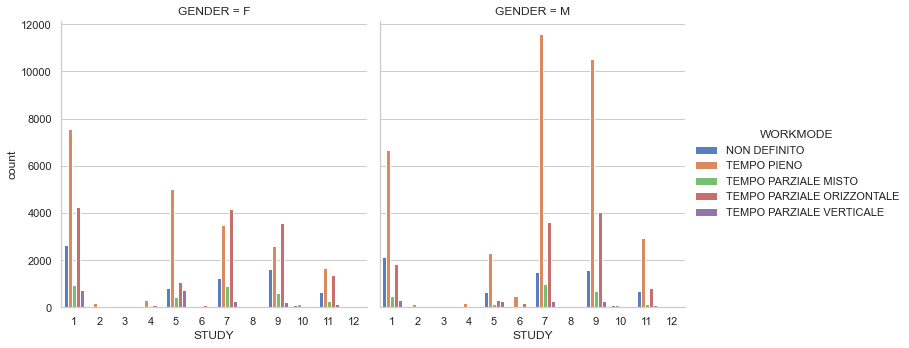

In [75]:
sns.set(style="whitegrid")

g = sns.catplot(x="STUDY", hue="WORKMODE", col="GENDER", kind="count", data=sample_df2_replace, palette="muted")